<a href="https://colab.research.google.com/github/SirwaniViren/MSc-Gousto-Project/blob/main/initial_framework_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import numpy as np
import pandas as pd
import random
from collections import defaultdict
from random import randrange
import matplotlib.pyplot as plt

In [5]:
random.seed(42)

In [6]:
def create_eligibility_dict(num_factories, num_items):
    items = list(range(100, 100 + num_items * 10, 10))
    eligibility_dict = {}

    # Start with a base number of items for the first factory
    num_eligible_items = random.randint(5, 15)

    for i in range(1, num_factories + 1):
        if i == num_factories:
            # Last factory gets all items
            eligibility_dict[f"F{i}"] = items
        else:
            eligibility_dict[f"F{i}"] = items[:num_eligible_items]
            # Randomly determine the number of additional items for the next factory
            num_eligible_items += random.randint(1, 10)
            # Ensure num_eligible_items does not exceed the total number of items
            num_eligible_items = min(num_eligible_items, num_items)

    return eligibility_dict

In [7]:
def create_factory_caps(num_factory, max_boxes):
    factory_caps = {}
    # Start with an initial capacity for the first factory
    cap = random.randint(1, max_boxes // 10)  # Starting with a base capacity

    for i in range(1, num_factory + 1):
        if i == num_factory:
            # Last factory gets infinite capacity
            factory_caps[f"F{i}"] = float('inf')
        else:
            factory_caps[f"F{i}"] = cap
            # Randomly increase the capacity for the next factory
            cap += random.randint(1, max_boxes // 10)
            # Ensure the capacity does not exceed max_boxes
            cap = min(cap, max_boxes)

    return factory_caps


def generate_total_boxes(factory_caps, min_extra_boxes, max_extra_boxes, lead_day):
    # Calculate total capacity excluding the infinite capacity
    finite_capacity = sum(cap for cap in factory_caps.values() if cap != float('inf'))

    # Add a random number of extra boxes to exceed the total capacity
    extra_boxes = random.randint(min_extra_boxes, max_extra_boxes)
    total_boxes = finite_capacity + extra_boxes

    # Determine the proportion of simulated orders based on the lead day
    if lead_day == 0:
        simulated_order_percentage = 0
    else:
        # Simulate orders percentage decreases linearly with lead day
        simulated_order_percentage = max(0, min(100, (lead_day / 18) * 100))

    # Calculate number of real and simulated orders
    num_simulated_orders = int(total_boxes * simulated_order_percentage / 100)
    num_real_orders = total_boxes - num_simulated_orders

    return num_real_orders, num_simulated_orders

In [8]:
def generate_order_list(order_count, order_type, items, max_items_per_order):
    orders = []
    order_id = 1

    while order_count > 0:
        num_items_in_order = min(random.randint(1, max_items_per_order), order_count)
        order_items = random.sample(items, num_items_in_order)
        for item in order_items:
            orders.append({'order_id': order_id, 'item_id': item, 'order_type': order_type})
        order_count -= 1
        order_id += 1

    return orders

def generate_orders(total_real_orders, total_simulated_orders, num_items, max_items_per_order=5):
    items = list(range(100, 100 + num_items * 10, 10))

    # Generate real orders
    real_orders = generate_order_list(total_real_orders, 'real', items, max_items_per_order)

    # Generate simulated orders
    simulated_orders = generate_order_list(total_simulated_orders, 'simulated', items, max_items_per_order)

    # Combine real and simulated orders
    all_orders = real_orders + simulated_orders

    # Convert to DataFrame
    orders_df = pd.DataFrame(all_orders)
    return orders_df

In [9]:
def compute_orders_eligibility(orders_df, eligibility_dict):
    orders_eligibility = []

    for order_id in orders_df['order_id'].unique():
        order_items = orders_df[orders_df['order_id'] == order_id]['item_id'].tolist()
        order_type = orders_df[orders_df['order_id'] == order_id]['order_type'].iloc[0]
        eligible_factories = []
        for factory, items in eligibility_dict.items():
            if all(item in items for item in order_items):
                eligible_factories.append(factory)
        orders_eligibility.append({'order_id': order_id, 'eligibility': eligible_factories, 'order_type': order_type})

    orders_eligibility_df = pd.DataFrame(orders_eligibility)
    return orders_eligibility_df

In [10]:
eligibility_dict = create_eligibility_dict(20, 100)
factory_caps = create_factory_caps(20, 100)

# print to check
print(list(eligibility_dict.items())[:10])
print("\n")
print(list(factory_caps.items())[:10])

[('F1', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]), ('F2', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]), ('F3', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]), ('F4', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]), ('F5', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360]), ('F6', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]), ('F7', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430]), ('F8', [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 2

In [12]:
real_orders_5, sim_orders_5 = generate_total_boxes(factory_caps, 1000, 2000, 5)
orders_5 = generate_orders(real_orders_5, sim_orders_5, 100, 5)
order_eligibility_5 = compute_orders_eligibility(orders_5, eligibility_dict)

print("\n")
print(orders_5.head())
print("\n")
print(order_eligibility_5.head())



   order_id  item_id order_type
0         1      240       real
1         1      950       real
2         1      800       real
3         1      180       real
4         2      410       real


   order_id                                        eligibility order_type
0         1                                         [F19, F20]       real
1         2  [F10, F11, F12, F13, F14, F15, F16, F17, F18, ...       real
2         3      [F12, F13, F14, F15, F16, F17, F18, F19, F20]       real
3         4      [F12, F13, F14, F15, F16, F17, F18, F19, F20]       real
4         5                                    [F18, F19, F20]       real


In [16]:
real_orders_0, sim_orders_0 = generate_total_boxes(factory_caps, 3000, 4000, 0)
orders_0 = generate_orders(real_orders_0, sim_orders_0, 100, 5)
order_eligibility_0 = compute_orders_eligibility(orders_0, eligibility_dict)

print("\n")
print(orders_0.head())
print("\n")
print(order_eligibility_0.head())



   order_id  item_id order_type
0         1      710       real
1         1      310       real
2         1     1060       real
3         1      430       real
4         2      340       real


   order_id      eligibility order_type
0         1            [F20]       real
1         2  [F18, F19, F20]       real
2         3  [F18, F19, F20]       real
3         4  [F18, F19, F20]       real
4         5  [F18, F19, F20]       real


In [14]:
def allocate_orders(allocated_orders, allocated_order_eligibility, allocated_factory_caps):
    # Initialize columns
    allocated_orders['site'] = 'not_routed'
    allocated_order_eligibility['allocated'] = False

    # Iterate through each factory except the catch-all
    for factory in list(allocated_factory_caps.keys())[:-1]:
        cap = allocated_factory_caps[factory]

        # Get set S of unrouted orders eligible to the current factory
        eligible_orders = allocated_order_eligibility[(allocated_order_eligibility['allocated'] == False) &
                                                      (allocated_order_eligibility['eligibility'].apply(lambda i: factory in i))]

        if len(eligible_orders) < cap:
            raise ValueError(f'Not enough eligible orders for {factory}')
        else:
            for _ in range(cap):
                if len(eligible_orders) == 0:
                    break
                # Pick a random order from the eligible list
                selected_order = eligible_orders.sample(1).iloc[0]
                order_id = selected_order['order_id']

                # Allocate items in allocated_orders
                allocated_orders.loc[allocated_orders['order_id'] == order_id, 'site'] = factory

                # Mark the order as allocated in allocated_order_eligibility
                allocated_order_eligibility.loc[allocated_order_eligibility['order_id'] == order_id, 'allocated'] = True

                # Update the eligible_orders to exclude the allocated order
                eligible_orders = eligible_orders[eligible_orders['order_id'] != order_id]

    # Allocate remaining orders to catch-all
    catch_all_factory = list(allocated_factory_caps.keys())[-1]
    remaining_orders = allocated_order_eligibility[allocated_order_eligibility['allocated'] == False]
    for order_id in remaining_orders['order_id']:
        allocated_orders.loc[allocated_orders['order_id'] == order_id, 'site'] = catch_all_factory
        allocated_order_eligibility.loc[allocated_order_eligibility['order_id'] == order_id, 'allocated'] = True

    return allocated_orders

In [17]:
allocation_5 = allocate_orders(orders_5.copy(), order_eligibility_5.copy(), factory_caps.copy())
allocation_0 = allocate_orders(orders_0.copy(), order_eligibility_0.copy(), factory_caps.copy())

In [ ]:
site_to_check = 'F19'
count_simulated_orders = allocation_5[
    (allocation_5['site'] == site_to_check) &
    (allocation_5['order_type'] == 'real')
]['order_id'].nunique()
count_simulated_orders

100

In [ ]:
print(allocation_5)

       order_id  item_id order_type site  lead_5
0             1      400       real  F12       1
1             1      580       real  F12       1
2             1      230       real  F12       1
3             2      480       real  F20       1
4             2     1030       real  F20       1
...         ...      ...        ...  ...     ...
13234      1230      160  simulated  F18       1
13235      1231      140  simulated  F14       1
13236      1232      270  simulated  F20       1
13237      1232      120  simulated  F20       1
13238      1233      460  simulated  F10       1

[13239 rows x 5 columns]


In [ ]:
print(allocation_0)

       order_id  item_id order_type site  lead_0
0             1      680       real  F18       1
1             1      290       real  F18       1
2             1      390       real  F18       1
3             1      370       real  F18       1
4             2      160       real  F16       1
...         ...      ...        ...  ...     ...
13009      4343      490       real  F20       1
13010      4343      930       real  F20       1
13011      4343      570       real  F20       1
13012      4344      450       real  F20       1
13013      4345      180       real  F16       1

[13014 rows x 5 columns]


In [ ]:
def plot_factory_capacities(allocated_orders_df, factory_caps):
    # Aggregate the orders by site and type
    real_orders_agg = allocated_orders_df[allocated_orders_df['order_type'] == 'real'].groupby('site')['order_id'].nunique()
    simulated_orders_agg = allocated_orders_df[allocated_orders_df['order_type'] == 'simulated'].groupby('site')['order_id'].nunique()
    ff = real_orders_agg + simulated_orders_agg

    # Exclude the catch-all factory
    if 'F20' in factory_caps:
        del factory_caps['F20']

    # Ensure all sites are included in the aggregation and in the correct order
    all_sites = list(factory_caps.keys())
    real_orders_agg = real_orders_agg.reindex(all_sites, fill_value=0)
    simulated_orders_agg = simulated_orders_agg.reindex(all_sites, fill_value=0)

    # Prepare data for plotting
    sites = all_sites
    real_volumes = real_orders_agg[sites].values
    simulated_volumes = simulated_orders_agg[sites].values
    capacities = [factory_caps[site] if site in factory_caps else 0 for site in sites]

    # Plot the data
    fig, ax = plt.subplots(figsize=(15, 9))
    bar_width = 0.6

    bars_real = ax.bar(sites, real_volumes, bar_width, color='blue', label='Real Orders')
    bars_simulated = ax.bar(sites, simulated_volumes, bar_width, bottom=real_volumes, color='orange', label='Simulated Orders')

    # Add capacity lines and labels
    for site, cap in zip(sites, capacities):
        if cap == float('inf'):
            cap_label = 'inf'
        else:
            cap_label = str(cap)
            ax.plot([site, site], [0, cap], color='red', linestyle='--')
            ax.text(site, cap, cap_label, ha='center', va='bottom', color='red')

    ax.set_xlabel('Factories')
    ax.set_ylabel('Number of Orders')
    ax.set_title('Factory Capacities with Real and Simulated Orders')
    ax.legend()

    plt.show()

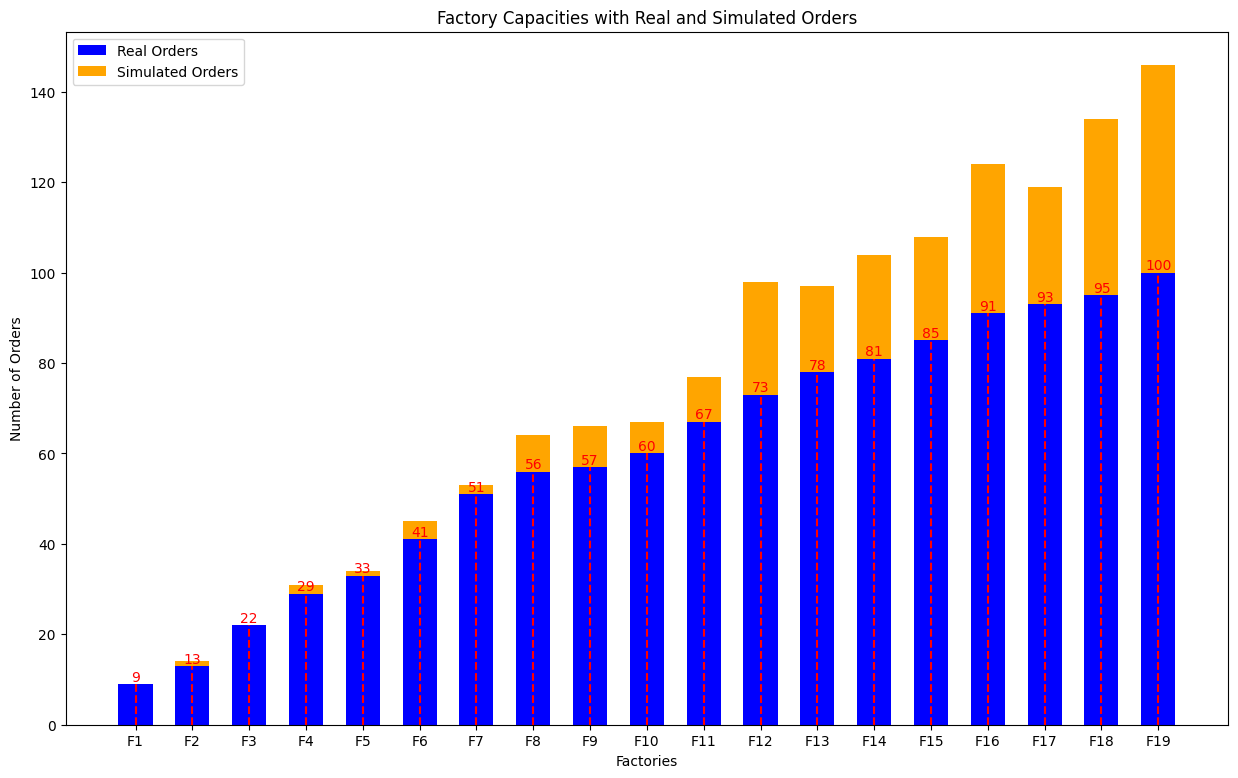

In [ ]:
plot_factory_capacities(allocation_5, factory_caps.copy())

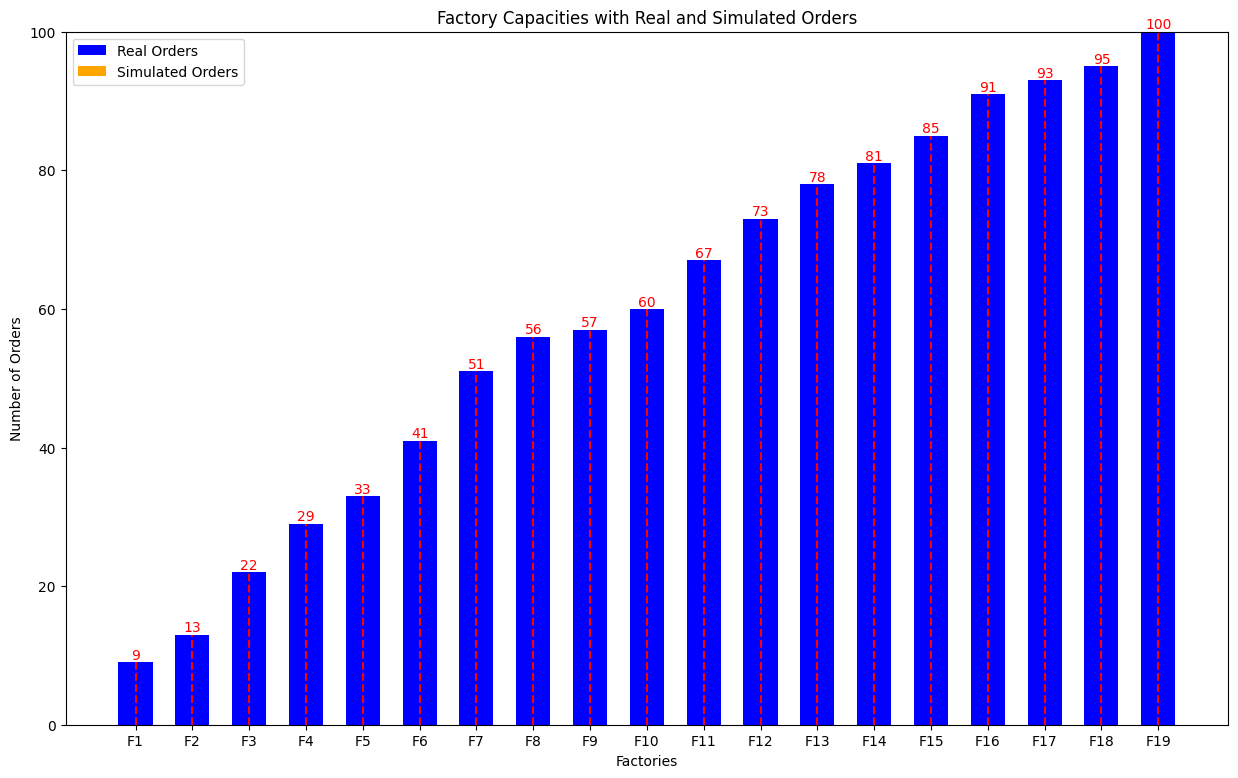

In [ ]:
plot_factory_capacities(allocation_0, factory_caps)

############################################################################################################################################################################################################################################################################################################################################################################################################################

In [ ]:
def aggregate_items(allocated_orders_df, day):
    lead_day = 'lead_' + str(day)
    aggregated_df = allocated_orders_df.groupby(['item_id', 'site']).size().reset_index(name=lead_day)
    return aggregated_df

In [ ]:
aggregated_5 = aggregate_items(allocation_5, 5)
aggregated_0 = aggregate_items(allocation_0, 0)

In [ ]:
print(aggregated_5)

     item_id site  lead_5
0        100  F10       1
1        100  F11       2
2        100  F12       1
3        100  F14       2
4        100  F15       4
..       ...  ...     ...
970     1050  F20     116
971     1060  F20     132
972     1070  F20     109
973     1080  F20     143
974     1090  F20     147

[975 rows x 3 columns]


In [ ]:
def merge_allocation(soft_df, hard_df, soft_num, hard_num):
    soft_day = 'lead_' + str(soft_num)
    hard_day = 'lead_' + str(hard_num)
    # Merge the two dataframes on 'item_id' and 'site'
    merged_df = pd.merge(soft_df, hard_df, on=['item_id', 'site'], how='outer')

    # Fill NaN values with zeros
    merged_df.fillna(0, inplace=True)

    # Ensure the integer type for lead_5 and lead_0 columns
    merged_df[soft_day] = merged_df[soft_day].astype(int)
    merged_df[hard_day] = merged_df[hard_day].astype(int)

    return merged_df

In [ ]:
# Merge the dataframes and calculate the absolute error
merged_10_0_df = merge_allocation(aggregated_ld10, aggregated_ld0, soft_num=10, hard_num=0)
merged_5_0_df = merge_allocation(aggregated_ld5, aggregated_ld0, soft_num=5, hard_num=0)

In [ ]:
def calculate_wmape_site(merged_df, soft_col, hard_col):
    total_forecast = merged_df["lead_0"].sum()
    site_df = merged_df.copy()
    site_df['abs_error'] = (site_df[soft_col] - site_df[hard_col]).abs()

    # Calculate WMAPE_site
    wmape_site = site_df["abs_error"].sum() / total_forecast

    return site_df, wmape_site

In [ ]:
def calculate_wmape_global(merged_df, soft_col, hard_col):
    total_forecast = merged_df["lead_0"].sum()
    global_df = merged_df.copy()
    global_df = global_df.groupby('item_id').sum().reset_index()
    global_df['abs_error'] = (global_df[soft_col] - global_df[hard_col]).abs()
    global_df = global_df.drop(['site'], axis=1, errors='ignore')

    # Calculate WMAPE_global
    wmape_global = global_df["abs_error"].sum() / total_forecast

    return global_df, wmape_global

In [ ]:
site_10_0_df, wmape_10_0_site = calculate_wmape_site(merged_10_0_df, soft_col='lead_10', hard_col='lead_0')
global_10_0_df, wmape_10_0_global = calculate_wmape_global(merged_10_0_df, soft_col='lead_10', hard_col='lead_0')
site_5_0_df, wmape_5_0_site = calculate_wmape_site(merged_5_0_df, soft_col='lead_5', hard_col='lead_0')
global_5_0_df, wmape_5_0_global = calculate_wmape_global(merged_5_0_df, soft_col='lead_5', hard_col='lead_0')

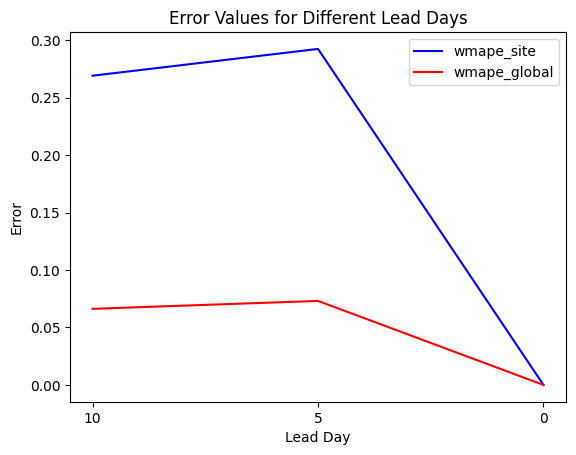

In [ ]:
lead_days = [10, 5, 0]
wmape_site_values = [wmape_10_0_site, wmape_5_0_site, 0]
wmape_global_values = [wmape_10_0_global, wmape_5_0_global, 0]

# Plot the data
plt.plot(lead_days, wmape_site_values, linestyle='-', color='b', label="wmape_site")
plt.plot(lead_days, wmape_global_values, linestyle='-', color='r', label="wmape_global")
plt.xlabel('Lead Day')
plt.ylabel('Error')
plt.title('Error Values for Different Lead Days')
plt.xticks([10, 5, 0])
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis to have 0 at the end
plt.show()